## Air and surface Ocean temperature correlation patterns

**Group members:** Chandler Bergstrom (cgbergstrom), Molly Bilhartz (mhbilhartz)

**Problem Statement:**
How do ocean and air temperatures correlate near certain buoy locations? What anomalies exist, and how do they correlate with climate events such as El Niño?

**Relevant Data Sets:**
- NOAA, specifically their World Ocean Database (WOD)
  WOD allows us to look through their database by filtering out or in characteristics we want in our data (geographical areas or certain characteristics such as temperature
NOAA WOD: https://www.ncei.noaa.gov/access/world-ocean-database-select/dbsearch.html

- NOAA Global Marine Observations in 10-degree Bins derived from the International Comprehensive Ocean-Atmosphere Data Set (ICOADS)
  Use maps to narrow down where we want to get data from and what years data is available for
(ICOADS): https://www.ncei.noaa.gov/access/search/data-search/global-marine?dataTypes=AIR_TEMP&startDate=1990-01-03T00:00:00&endDate=2010-01-03T23:59:59&pageNum=1&pageSize=10



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.dates as mdates
import seaborn as sns
import os


In [2]:
file_path = '../data/51210h2020.txt'

# Define the column names based on the header info
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Load the data
df = pd.read_csv(file_path, sep=r'\s+', comment='#', names=columns)

# Rename date/time columns to match what pandas expects
df.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)

# Create a proper datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Set datetime as index
df.set_index('datetime', inplace=True)

# Drop the now-unneeded date/time columns
df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

# Replace bad placeholder values (999, 999.0, 9999.0) with NaN
df.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)

# Preview
df.head()


,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2020-01-01 00:00:00,<NA>,99.0,99.0,2.01,9.09,6.26,72,<NA>,<NA>,25.5,<NA>,99.0,99.0
2020-01-01 00:30:00,<NA>,99.0,99.0,2.04,9.88,6.22,62,<NA>,<NA>,25.5,<NA>,99.0,99.0
2020-01-01 01:00:00,<NA>,99.0,99.0,2.18,7.69,6.38,62,<NA>,<NA>,25.5,<NA>,99.0,99.0
2020-01-01 01:30:00,<NA>,99.0,99.0,2.24,9.09,6.30,74,<NA>,<NA>,25.5,<NA>,99.0,99.0
2020-01-01 02:00:00,<NA>,99.0,99.0,2.33,9.09,6.50,71,<NA>,<NA>,25.5,<NA>,99.0,99.0


/opt/anaconda3/envs/GPGN268/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/envs/GPGN268/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


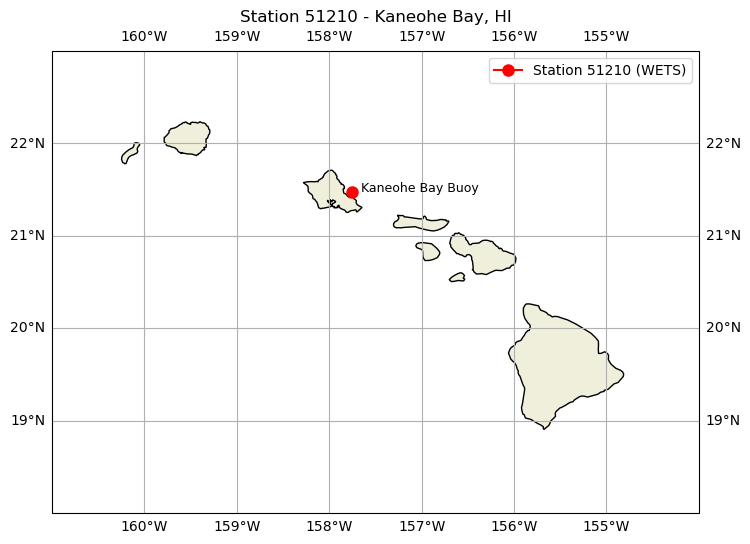

In [1]:
# Create map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines(draw_labels=True)

# Set bounds for Hawaii region (optional)
ax.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())

# Plot buoy location manually
buoy_lat = 21.477
buoy_lon = -157.757  # western longitudes are negative in Cartopy

ax.plot(buoy_lon, buoy_lat, marker='o', color='red', markersize=8, label='Station 51210 (WETS)')
ax.text(buoy_lon + 0.1, buoy_lat, 'Kaneohe Bay Buoy', fontsize=9)

# Optional legend
plt.legend()
plt.title('Station 51210 - Kaneohe Bay, HI')
plt.show()


**Figure 1:** Location of origin of data in this project.

In [42]:
airtemp_path = "/Users/chandlerbergstrom/Downloads/51002h2020.txt"

# Define column names from the dataset header
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Read the data
df_air = pd.read_csv(airtemp_path, sep=r'\s+', comment='#', names=columns)

# Rename date/time columns for pandas
df_air.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)

# Convert to datetime
df_air['datetime'] = pd.to_datetime(df_air[['year', 'month', 'day', 'hour', 'minute']])
df_air.set_index('datetime', inplace=True)

# Drop separate date/time columns
df_air.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

# Replace placeholder values with NaN
df_air.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)

# Drop rows where ATMP or WTMP is missing
df_air = df_air.dropna(subset=['ATMP', 'WTMP'])

# Then convert to float
df_air[['ATMP', 'WTMP']] = df_air[['ATMP', 'WTMP']].astype(float)

# Convert temps to float
df_air[['ATMP', 'WTMP']] = df_air[['ATMP', 'WTMP']].astype(float)

df_air[['ATMP', 'WTMP']].head()


,ATMP,WTMP
datetime,,
2020-01-01 00:00:00,25.1,26.5
2020-01-01 00:10:00,24.8,26.5
2020-01-01 00:20:00,24.7,26.5
2020-01-01 00:30:00,24.9,26.5
2020-01-01 00:40:00,24.4,26.5


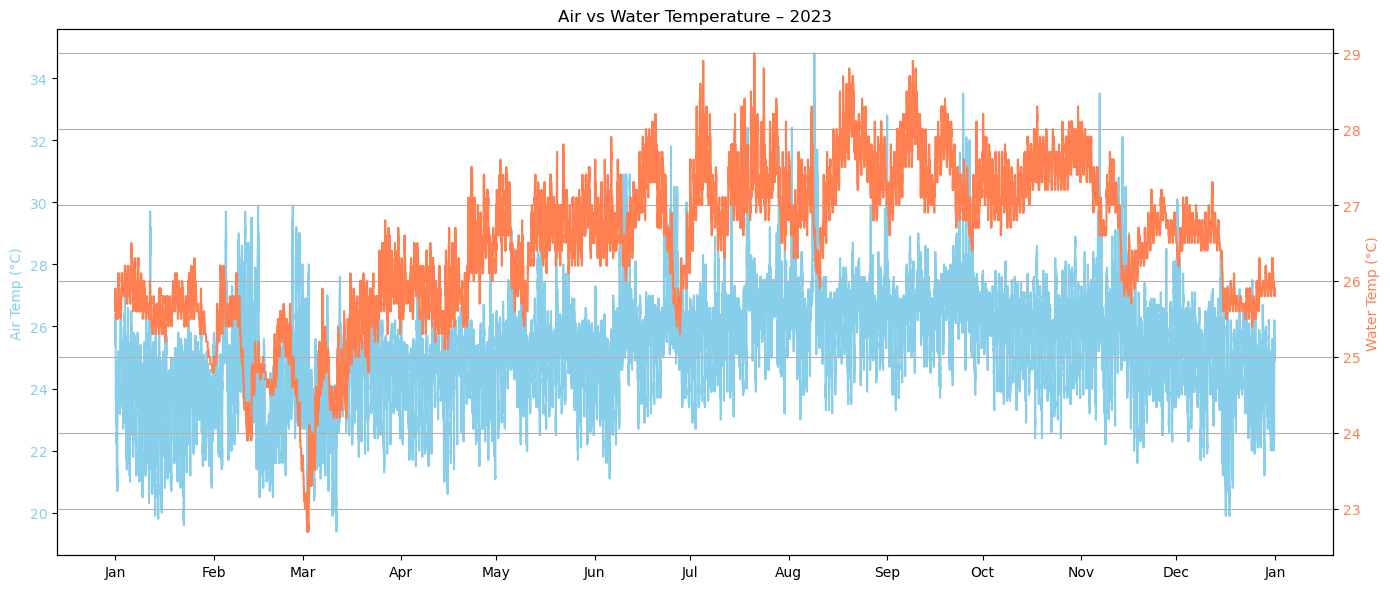

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for 2023 data
df_2023 = df_all[(df_all.index.year == 2023)]

# Drop rows with missing values in either ATMP or WTMP
combo = df_2023[['ATMP', 'WTMP']].dropna()

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Air Temp on left axis
ax1.plot(combo.index, combo['ATMP'], color='skyblue', label='Air Temp (°C)')
ax1.set_ylabel('Air Temp (°C)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Water Temp on right axis
ax2 = ax1.twinx()
ax2.plot(combo.index, combo['WTMP'], color='coral', label='Water Temp (°C)')
ax2.set_ylabel('Water Temp (°C)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Format x-axis to show months
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Title and styling
plt.title('Air vs Water Temperature – 2023')
plt.grid(True)
fig.tight_layout()
plt.show()


**Figure 2** Air vs Water Temperature graph for 2023

2023 is an EL Nino year, and the graph shows a clear difference between water and air temperature. El Nino is a natural weather pattern that results in warmer sea surface temperatures in the central and eastern Pacific Ocean. It occurs every 2-7 years but completely at random. El Nino has global weather pattern impacts. Typically, as seen in the other graphs, water and air temperatures are relatively synced and follow each other very closely. In this graph, water temperatures veer quite a bit, by a couple degrees Celsius. El Nino results in higher sea surface temperatures, and this graph shows result of that. 

In [26]:
data_folder = "../data"

# Columns based on file structure
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Loop through all files in the data folder
for filename in sorted(os.listdir(data_folder)):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_folder, filename)
        print(f"Processing {filename}...")

        # Load data
        df = pd.read_csv(filepath, sep=r'\s+', comment='#', names=columns)

        # Fix datetime
        df.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']], errors='coerce')
        df.set_index('datetime', inplace=True)
        df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

        # Clean and filter data
        df.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)
        df = df.dropna(subset=['ATMP', 'WTMP'])

        try:
            df[['ATMP', 'WTMP']] = df[['ATMP', 'WTMP']].astype(float)
        except Exception as e:
            print(f"⚠️ Skipping {filename} due to conversion error: {e}")
            continue

        # Plot
        fig, ax1 = plt.subplots(figsize=(14, 6))
        ax1.plot(df.index, df['ATMP'], color='skyblue', label='Air Temp')
        ax1.set_ylabel('Air Temp (°C)', color='skyblue')
        ax1.tick_params(axis='y', labelcolor='skyblue')

        ax2 = ax1.twinx()
        ax2.plot(df.index, df['WTMP'], color='coral', label='Water Temp')
        ax2.set_ylabel('Water Temp (°C)', color='coral')
        ax2.tick_params(axis='y', labelcolor='coral')

        ax1.xaxis.set_major_locator(mdates.MonthLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        year = filename[6:10]
        plt.title(f'Air vs Water Temperature – {year}')
        plt.grid(True)
        fig.tight_layout()

        # Save the plot
        out_filename = f"air_water_temp_{year}.png"
        plt.savefig(out_filename, dpi=300)
        plt.close()

        print(f"✅ Saved plot: {out_filename}")


Processing 51210h2016.txt...
✅ Saved plot: air_water_temp_2016.png
Processing 51210h2017.txt...
✅ Saved plot: air_water_temp_2017.png
Processing 51210h2018.txt...
✅ Saved plot: air_water_temp_2018.png
Processing 51210h2019.txt...
✅ Saved plot: air_water_temp_2019.png
Processing 51210h2020.txt...
✅ Saved plot: air_water_temp_2020.png
Processing 51210h2021.txt...
✅ Saved plot: air_water_temp_2021.png
Processing 51210h2023.txt...
✅ Saved plot: air_water_temp_2023.png
Processing 51210h2024.txt...
✅ Saved plot: air_water_temp_2024.png
Processing kwhh1h2016.txt...
✅ Saved plot: air_water_temp_2016.png
Processing kwhh1h2017.txt...
✅ Saved plot: air_water_temp_2017.png
Processing kwhh1h2018.txt...
✅ Saved plot: air_water_temp_2018.png
Processing kwhh1h2019.txt...
✅ Saved plot: air_water_temp_2019.png
Processing kwhh1h2020.txt...
✅ Saved plot: air_water_temp_2020.png
Processing kwhh1h2021.txt...
✅ Saved plot: air_water_temp_2021.png
Processing kwhh1h2022.txt...
✅ Saved plot: air_water_temp_2022

In [27]:
data_folder = "../data"
columns = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", 
           "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]

# Empty list to collect data from each year
all_years = []

for filename in sorted(os.listdir(data_folder)):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath, sep=r'\s+', comment='#', names=columns)
        df.rename(columns={"YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute"}, inplace=True)
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']], errors='coerce')
        df.set_index('datetime', inplace=True)
        df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)
        df.replace({999: pd.NA, 999.0: pd.NA, 9999.0: pd.NA}, inplace=True)
        df = df.dropna(subset=['ATMP', 'WTMP'])
        df[['ATMP', 'WTMP']] = df[['ATMP', 'WTMP']].astype(float)
        all_years.append(df[['ATMP', 'WTMP']])

# Combine into one DataFrame
df_all = pd.concat(all_years)


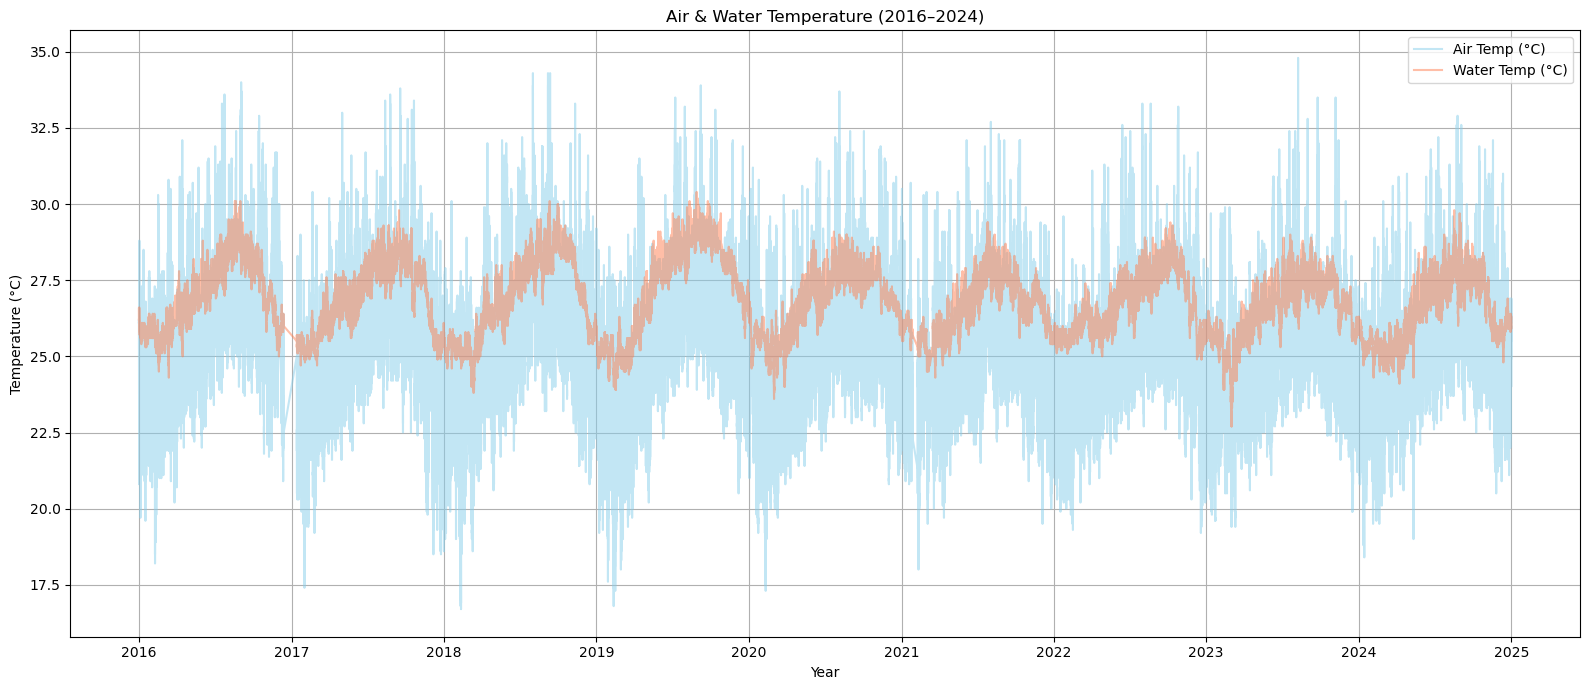

In [73]:
plt.figure(figsize=(16, 7))

# Air Temp
plt.plot(df_all.index, df_all['ATMP'], label='Air Temp (°C)', color='skyblue', alpha=0.5)

# Water Temp
plt.plot(df_all.index, df_all['WTMP'], label='Water Temp (°C)', color='coral', alpha=0.5)

plt.title('Air & Water Temperature (2016–2024)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

# Format x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


**Figure 3** Air and Water Temperature 8 Year Span (2016-2018) 

Figure 3 allows further analysis. Because the graph shows the entire 8 year span, it gives a broader picture to the variables correlation. The graph shows clear correlation between the two variables as they relatively follow the same pattern/long. This suggests strong atmosphere-ocean couple which means that what happens to one system, influences and is influenced by the other system. 

In [76]:
# Make a copy to avoid modifying original
df_summary = df_all.copy()

# Extract year from datetime
df_summary['year'] = df_summary.index.year

# Group by year and calculate mean and std dev
yearly_stats = df_summary.groupby('year').agg({
    'ATMP': ['mean', 'std'],
    'WTMP': ['mean', 'std']
})

# Flatten column names
yearly_stats.columns = ['ATMP_mean', 'ATMP_std', 'WTMP_mean', 'WTMP_std']
yearly_stats = yearly_stats.reset_index()

# Preview the summary
yearly_stats


,year,ATMP_mean,ATMP_std,WTMP_mean,WTMP_std
0,2016,25.921507,1.821757,26.954880,1.125424
1,2017,25.579143,1.899277,26.829629,1.101025
2,2018,25.771448,1.961936,26.852308,1.330938
3,2019,25.794833,2.144123,27.212716,1.555469
4,2020,25.459934,1.721434,26.659732,1.052219
5,2021,25.373878,1.632937,26.561948,0.897921
6,2022,25.401131,1.585606,26.626785,0.939773
7,2023,25.320149,1.599468,26.459979,0.993709
8,2024,25.446048,1.676085,26.399936,1.092002


## All Years- SD and Mean Air and Water

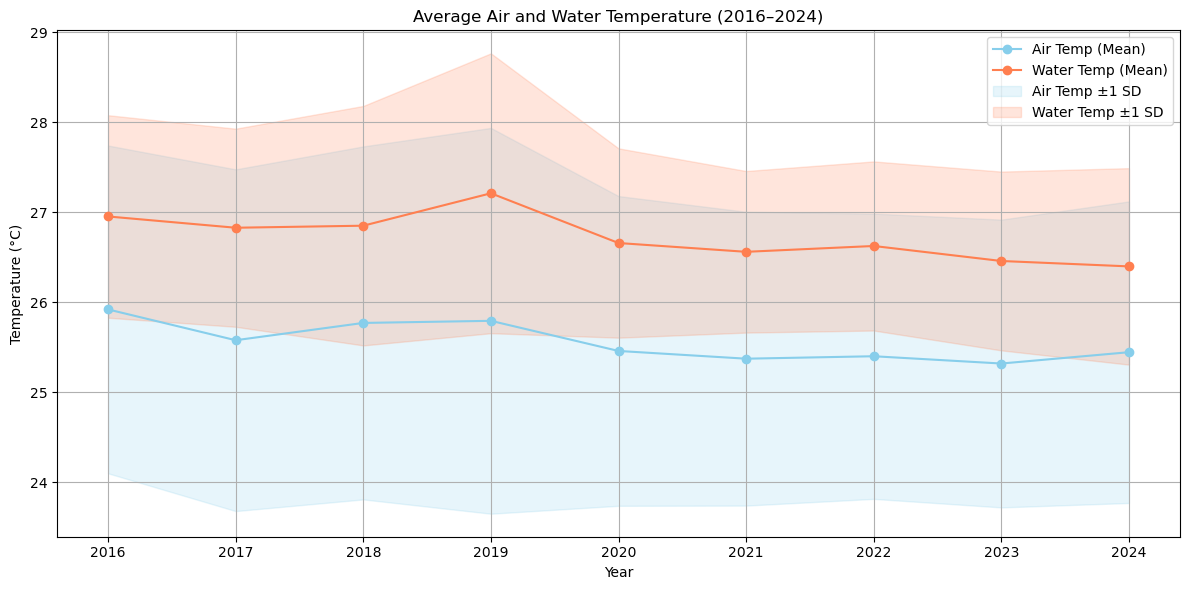

In [78]:
plt.figure(figsize=(12, 6))

# X values (years)
years = yearly_stats['year']

# Plot mean temps
plt.plot(years, yearly_stats['ATMP_mean'], label='Air Temp (Mean)', color='skyblue', marker='o')
plt.plot(years, yearly_stats['WTMP_mean'], label='Water Temp (Mean)', color='coral', marker='o')

# Shaded area: ±1 std dev
plt.fill_between(years,
                 yearly_stats['ATMP_mean'] - yearly_stats['ATMP_std'],
                 yearly_stats['ATMP_mean'] + yearly_stats['ATMP_std'],
                 color='skyblue', alpha=0.2, label='Air Temp ±1 SD')

plt.fill_between(years,
                 yearly_stats['WTMP_mean'] - yearly_stats['WTMP_std'],
                 yearly_stats['WTMP_mean'] + yearly_stats['WTMP_std'],
                 color='coral', alpha=0.2, label='Water Temp ±1 SD')

# Labels & styling
plt.title('Average Air and Water Temperature (2016–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Figure 4** Average Air and Water Temperature 8 Year Span (2016-2024)

El Nino years within the time frame of this data analysis (2016-2024) is 2016, 2018, 2019, 2023, and 2024. As seen above, some of the highest peaks (2016, 2018, and 2019) are El Nino years. The graph shows clear anomalies, and there seems to be an indicator that it may have to do with El Nino because the highest temperatures are the El Nino years.

In [8]:
for year in range(2016, 2025):
    df_year = df_all[df_all.index.year == year]

    # Resample by day (or change to 'M' for monthly)
    daily = df_year.resample('D').agg({
        'ATMP': ['mean', 'std'],
        'WTMP': ['mean', 'std']
    }).dropna()

    # Flatten column names
    daily.columns = ['ATMP_mean', 'ATMP_std', 'WTMP_mean', 'WTMP_std']

    # Plot
    plt.figure(figsize=(12, 6))

    # Air Temp
    plt.plot(daily.index, daily['ATMP_mean'], color='skyblue', label='Air Temp (Mean)')
    plt.fill_between(daily.index,
                     daily['ATMP_mean'] - daily['ATMP_std'],
                     daily['ATMP_mean'] + daily['ATMP_std'],
                     color='skyblue', alpha=0.2, label='Air Temp ±1 SD')

    # Water Temp
    plt.plot(daily.index, daily['WTMP_mean'], color='coral', label='Water Temp (Mean)')
    plt.fill_between(daily.index,
                     daily['WTMP_mean'] - daily['WTMP_std'],
                     daily['WTMP_mean'] + daily['WTMP_std'],
                     color='coral', alpha=0.2, label='Water Temp ±1 SD')

    # Labels
    plt.title(f'Daily Avg Air & Water Temp with ±1 SD – {year}')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Save or show
    plt.savefig(f"daily_temp_sd_{year}.png", dpi=300)
    plt.close()


NameError: name 'df_all' is not defined

## Heat/Contour Map- MONTHLY w/ El Nino lines

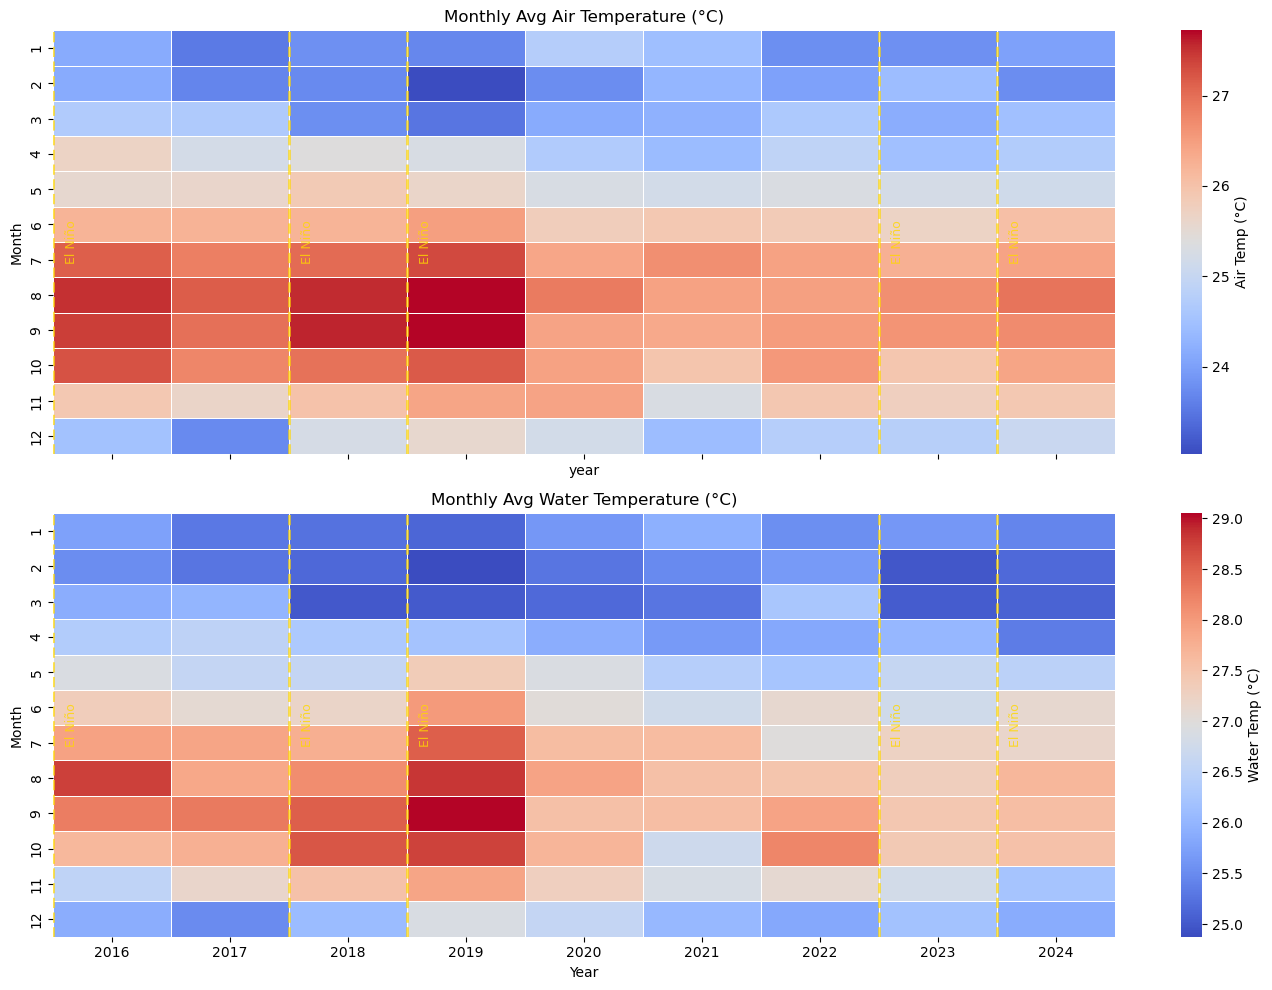

In [91]:
# Define El Niño years
el_nino_years = [2015, 2016, 2018, 2019, 2023, 2024]

# Drop missing values
df_month = df_all.dropna(subset=['ATMP', 'WTMP'])

# Add year/month columns
df_month['year'] = df_month.index.year
df_month['month'] = df_month.index.month

# Group monthly means
monthly_avg = df_month.groupby(['month', 'year'])[['ATMP', 'WTMP']].mean().unstack()

# Get individual DataFrames
air_temp = monthly_avg['ATMP']
water_temp = monthly_avg['WTMP']

# Set up plots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot air temperature heatmap
sns.heatmap(air_temp, ax=axes[0], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Air Temp (°C)'})
axes[0].set_title('Monthly Avg Air Temperature (°C)')
axes[0].set_ylabel('Month')

# Plot water temperature heatmap
sns.heatmap(water_temp, ax=axes[1], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Water Temp (°C)'})
axes[1].set_title('Monthly Avg Water Temperature (°C)')
axes[1].set_ylabel('Month')
axes[1].set_xlabel('Year')

# Add vertical highlight lines for El Niño years
for ax in axes:
    for year in el_nino_years:
        if year in air_temp.columns:  # Only draw if year exists in data
            ax.axvline(x=air_temp.columns.get_loc(year), color='gold', linestyle='--', linewidth=2, alpha=0.7)
            ax.text(air_temp.columns.get_loc(year) + 0.1, 0.5, 'El Niño', rotation=90, va='center',
                    fontsize=9, color='gold', alpha=0.8, transform=ax.get_xaxis_transform())

plt.tight_layout()
plt.show()


**Figure 5** Monthly Average Air and Water Temperature Heat Map with El Nino Years Highlighted

This figure is incredibly helpful as it shows exactly what years are El Nino, and uses color to draw attention to clear outliers and anomalies. It is very clear that 2016, 2018, and especially 2019 are the warmest years for air and water by a degree or two. This graph also shows that when one system (atomsphere or sea surface) changes, the other system tends to follow. 

## Correlation Plot

In [50]:
# Reset and use a leap year to safely parse Feb 29
seasonal = seasonal.reset_index()
seasonal['month_day'] = pd.to_datetime('2000-' + seasonal['month_day'], format='%Y-%m-%d', errors='coerce')
seasonal = seasonal.set_index('month_day').sort_index()


In [54]:
# Recreate 'month_day' and 'year' columns
df_all['month_day'] = df_all.index.strftime('%m-%d')
df_all['year'] = df_all.index.year

# Group by day-of-year across all years (baseline)
baseline = df_all.groupby('month_day')['WTMP'].agg(['mean', 'std']).reset_index()
baseline['month_day'] = pd.to_datetime('2000-' + baseline['month_day'], format='%Y-%m-%d', errors='coerce')
baseline = baseline.set_index('month_day').sort_index()


In [55]:
# Create seasonal profile: rows = day-of-year, columns = years
seasonal = df_all.groupby(['month_day', 'year'])['WTMP'].mean().unstack().reset_index()
seasonal['month_day'] = pd.to_datetime('2000-' + seasonal['month_day'], format='%Y-%m-%d', errors='coerce')
seasonal = seasonal.set_index('month_day').sort_index()


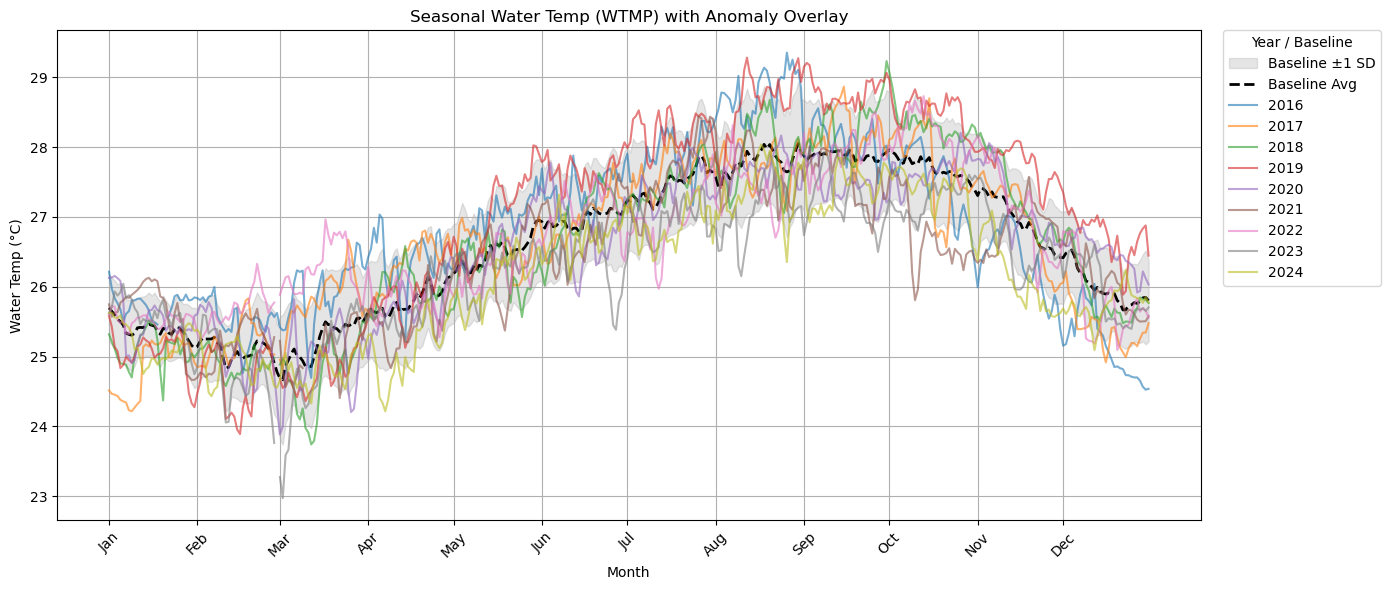

In [58]:
plt.figure(figsize=(14, 6))

# Plot anomaly baseline ±1 std dev band
plt.fill_between(baseline.index,
                 baseline['mean'] - baseline['std'],
                 baseline['mean'] + baseline['std'],
                 color='gray', alpha=0.2, label='Baseline ±1 SD')

# Plot baseline average
plt.plot(baseline.index, baseline['mean'], color='black', linestyle='--', linewidth=2, label='Baseline Avg')

# Plot each year's line
for col in seasonal.columns:
    if col != 'month_day':
        plt.plot(seasonal.index, seasonal[col], alpha=0.6, label=col)

# Clean axis
plt.xticks(pd.date_range("2000-01-01", "2000-12-31", freq='MS'),
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)

plt.title('Seasonal Water Temp (WTMP) with Anomaly Overlay')
plt.xlabel('Month')
plt.ylabel('Water Temp (°C)')
plt.grid(True)
plt.legend(title='Year / Baseline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


**Figure 6** Seasonal Water Temperature and Anomaly Overlay by Year

Although this graph is a little busy, it is possibly one of the most useful. Each year is color coded and a grey highlight representing standard deviation of 1 is shown in this graph. It allows us to see clear outliers. As seen throughout other graphs, 2016 and 2019 continue to have anomalies throughout the year, but especially in the second half of the year. El Nino has a clear correlation on sea surface temperature. 